Convolution Theorem Demonstration


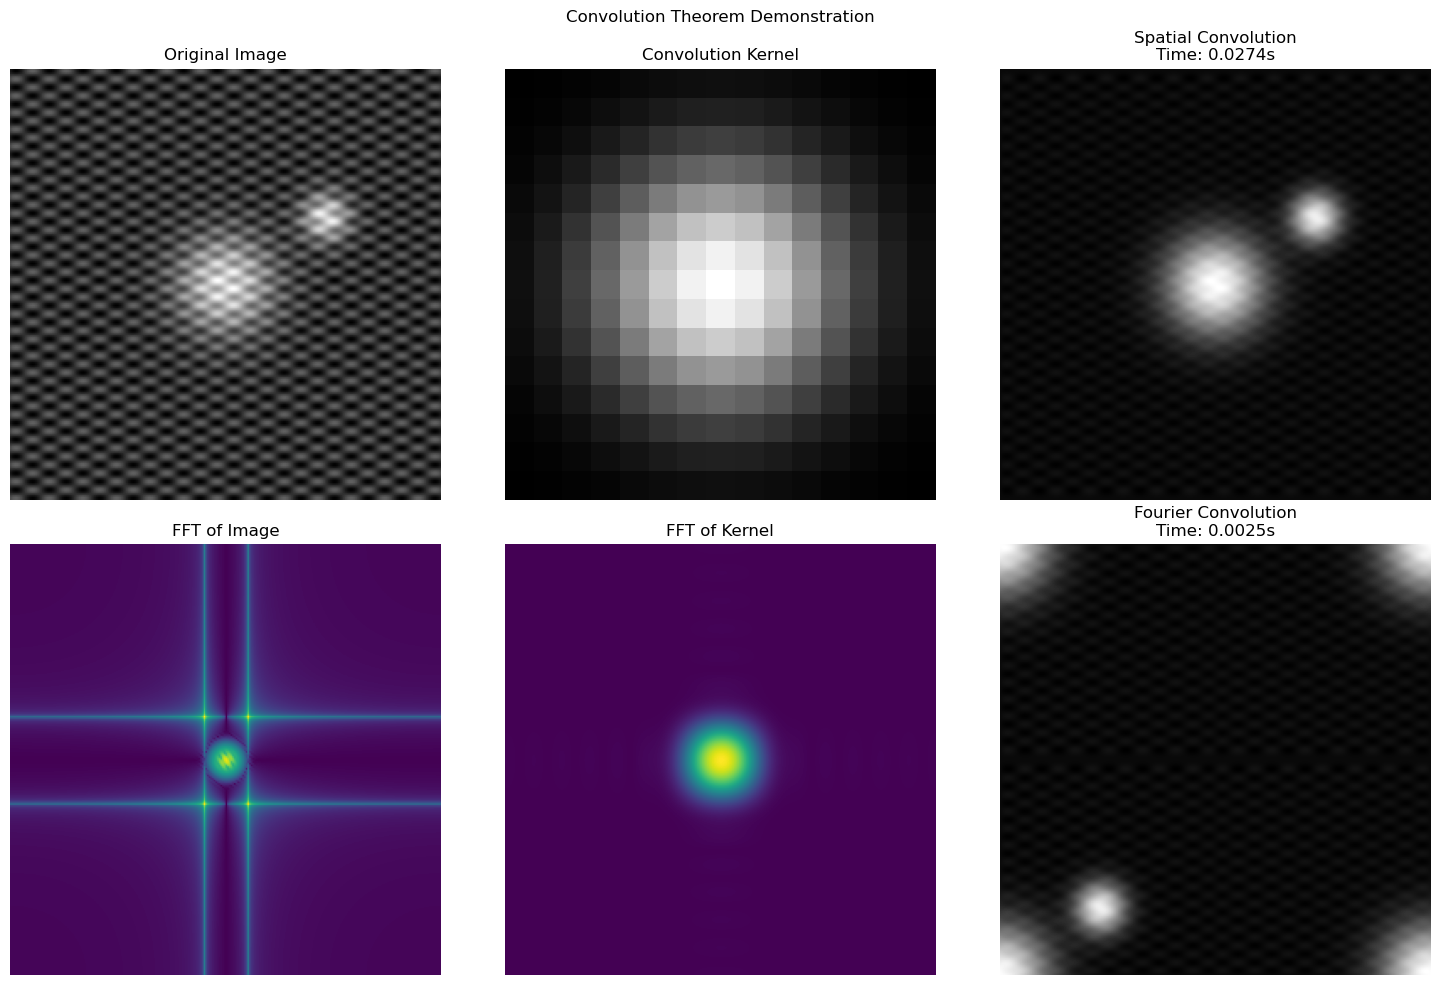

Maximum absolute difference between the two methods: 0.9859366683185313
Mean absolute difference between the two methods: 0.10814403331029182
Spatial convolution time: 0.0274 seconds
Fourier convolution time: 0.0025 seconds
Speed-up factor: 11.08x

Edge Detection Demonstration


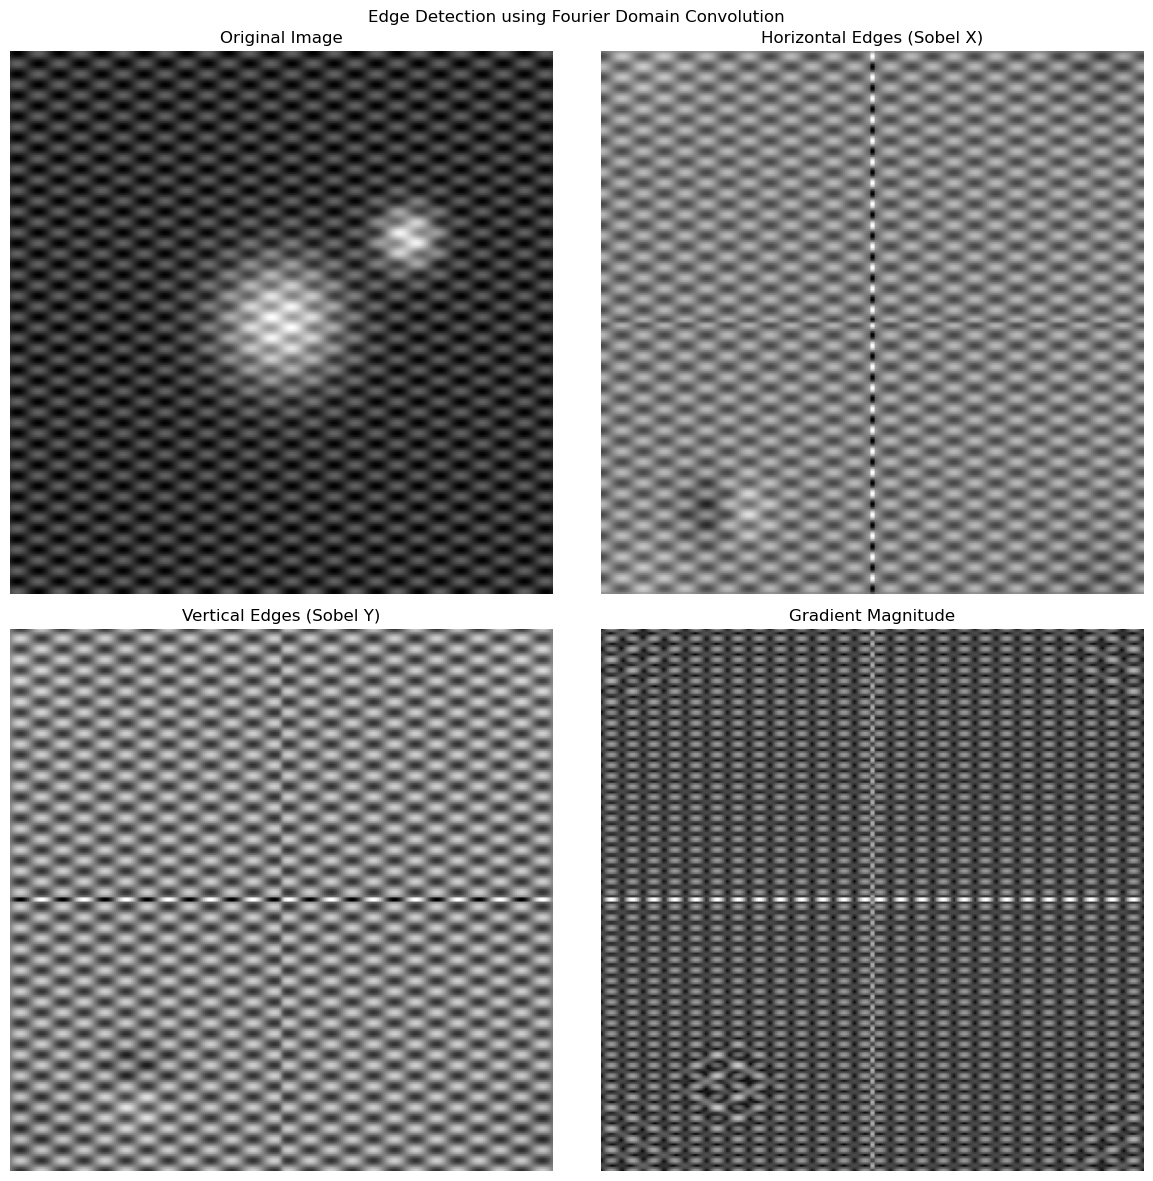

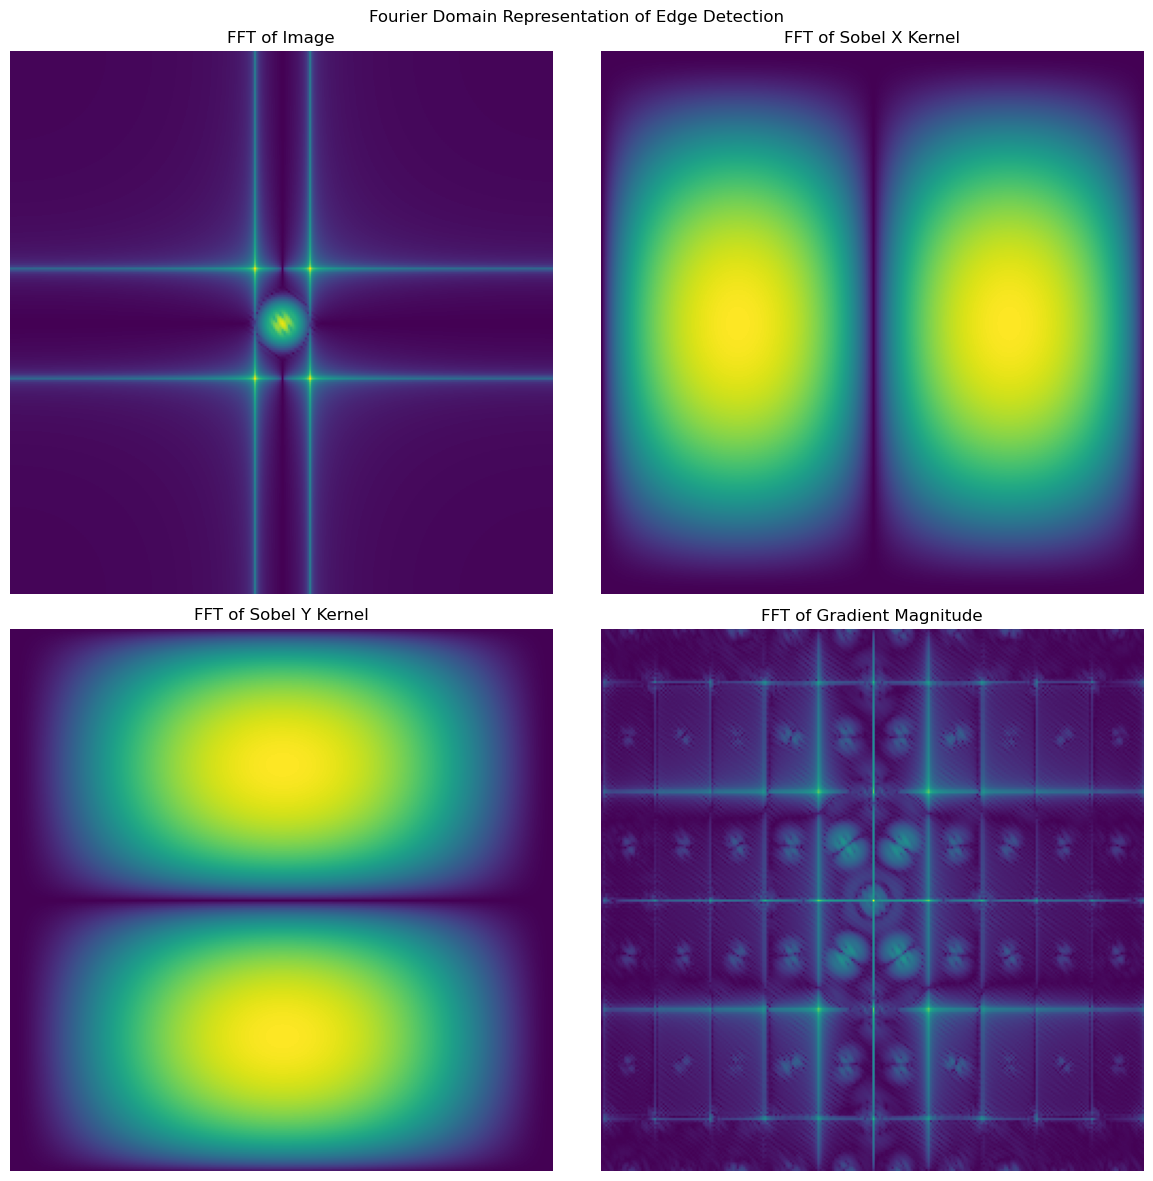


Optical Transfer Function Demonstration


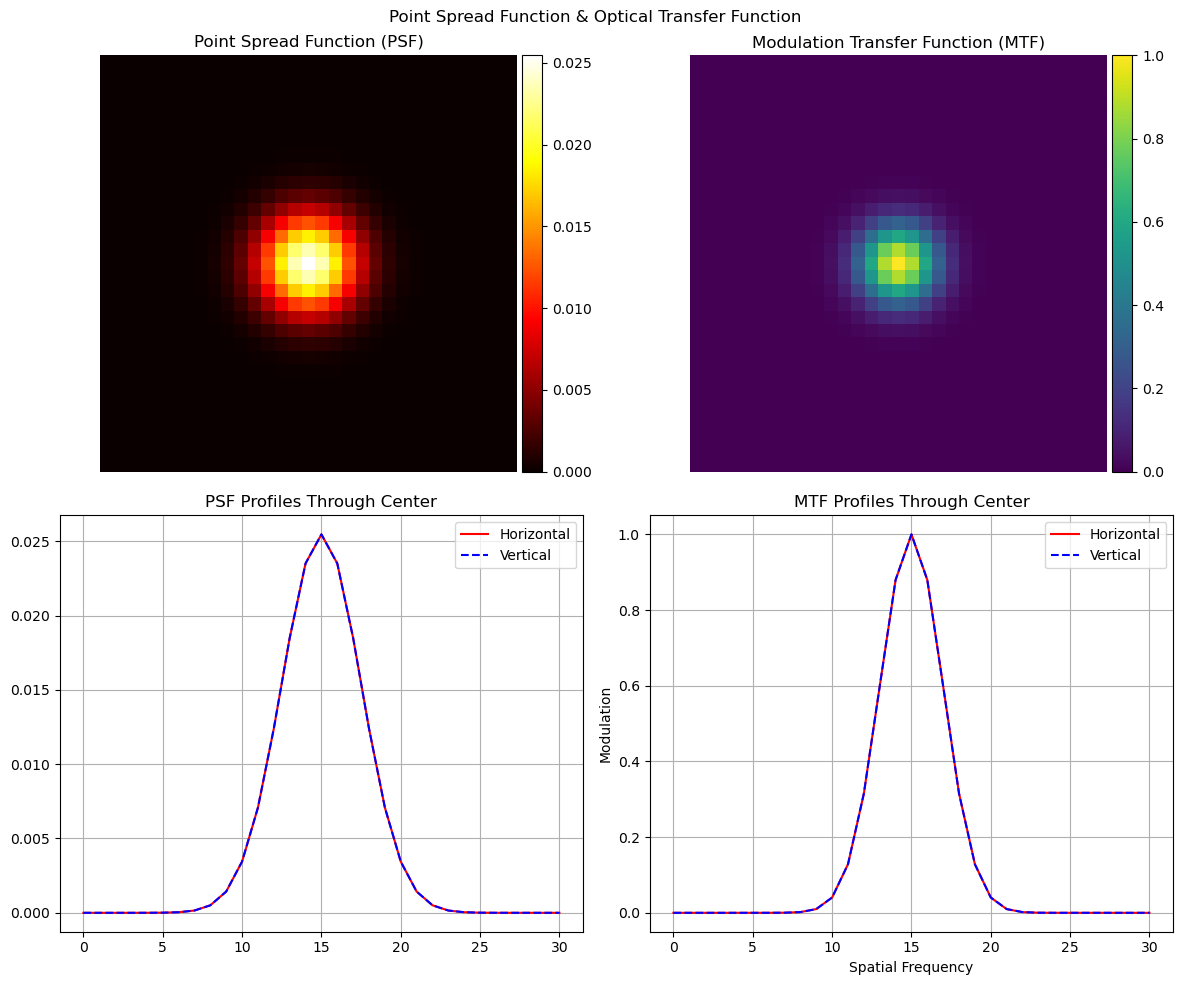

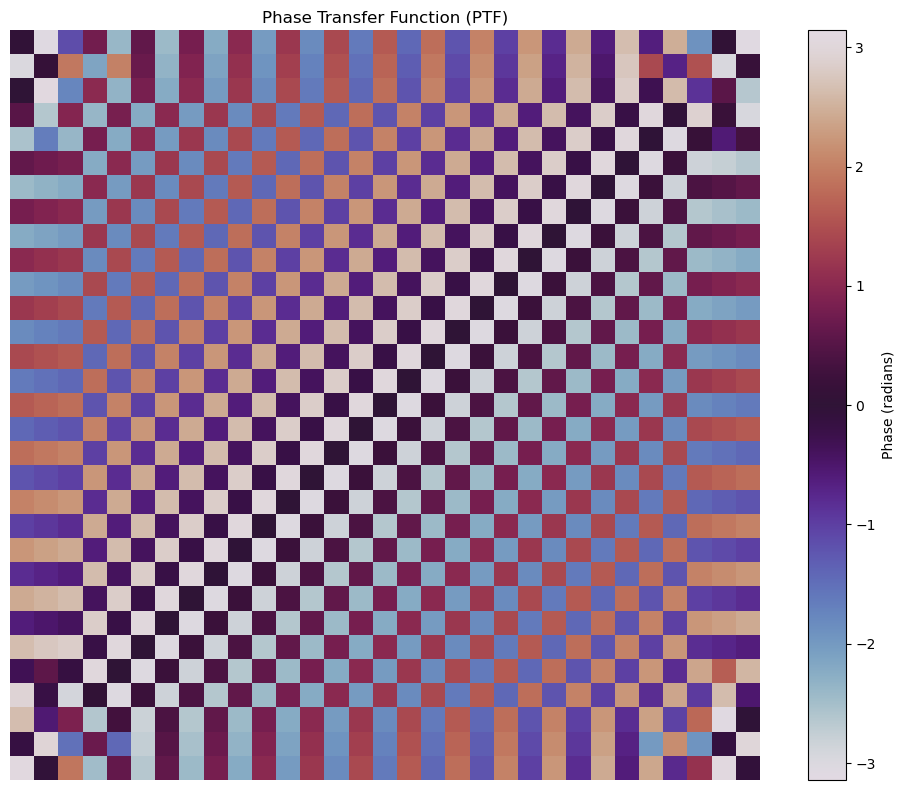

In [5]:
"""
convolution_theorem.py - Convolution theorem and applications in Fourier Optics

This module demonstrates the convolution theorem and its applications in
image processing and optical systems modeling. The convolution theorem states
that the Fourier transform of a convolution of two functions is equal to the 
product of their individual Fourier transforms.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.fftpack as fft
from scipy import signal
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable

def demonstrate_convolution_theorem(image, kernel):
    """
    Demonstrate the convolution theorem by comparing:
    1. Direct spatial convolution
    2. Convolution via the Fourier domain (multiplication of spectra)
    
    The convolution theorem states:
    F{f * g} = F{f} · F{g}
    
    Where * is the convolution operator and · is the pointwise multiplication.
    
    Parameters:
    -----------
    image : 2D numpy array
        The input image to be convolved
    kernel : 2D numpy array
        The convolution kernel
    """
    # Ensure kernel has odd dimensions
    if kernel.shape[0] % 2 == 0 or kernel.shape[1] % 2 == 0:
        raise ValueError("Kernel dimensions should be odd")
    
    # Method 1: Direct spatial convolution
    start_time = time.time()
    convolved_spatial = signal.convolve2d(image, kernel, mode='same', boundary='wrap')
    spatial_time = time.time() - start_time
    
    # Method 2: Convolution via Fourier domain
    start_time = time.time()
    
    # Pad kernel to the same size as the image
    padded_kernel = np.zeros_like(image)
    kh, kw = kernel.shape
    kh_center, kw_center = kh // 2, kw // 2
    h, w = image.shape
    h_center, w_center = h // 2, w // 2
    
    padded_kernel[h_center-kh_center:h_center+kh_center+1, 
                 w_center-kw_center:w_center+kw_center+1] = kernel
    
    # Compute FFTs
    fft_image = fft.fft2(image)
    fft_kernel = fft.fft2(padded_kernel)
    
    # Multiply in frequency domain (equivalent to convolution in spatial domain)
    fft_result = fft_image * fft_kernel
    
    # Transform back to spatial domain
    convolved_fourier = np.real(fft.ifft2(fft_result))
    fourier_time = time.time() - start_time
    
    # Plot the results
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle("Convolution Theorem Demonstration")
    
    # Plot the original image and kernel
    axs[0, 0].imshow(image, cmap='gray')
    axs[0, 0].set_title('Original Image')
    axs[0, 0].set_axis_off()
    
    # Plot the kernel (possibly zoomed in)
    axs[0, 1].imshow(kernel, cmap='gray')
    axs[0, 1].set_title('Convolution Kernel')
    axs[0, 1].set_axis_off()
    
    # Plot the spatial convolution result
    axs[0, 2].imshow(convolved_spatial, cmap='gray')
    axs[0, 2].set_title(f'Spatial Convolution\nTime: {spatial_time:.4f}s')
    axs[0, 2].set_axis_off()
    
    # Plot the Fourier domain representations
    axs[1, 0].imshow(np.log1p(np.abs(fft.fftshift(fft_image))), cmap='viridis')
    axs[1, 0].set_title('FFT of Image')
    axs[1, 0].set_axis_off()
    
    axs[1, 1].imshow(np.log1p(np.abs(fft.fftshift(fft_kernel))), cmap='viridis')
    axs[1, 1].set_title('FFT of Kernel')
    axs[1, 1].set_axis_off()
    
    # Plot the Fourier convolution result
    axs[1, 2].imshow(convolved_fourier, cmap='gray')
    axs[1, 2].set_title(f'Fourier Convolution\nTime: {fourier_time:.4f}s')
    axs[1, 2].set_axis_off()
    
    plt.tight_layout()
    plt.show()
    
    # Print the difference between the two methods
    diff = np.abs(convolved_spatial - convolved_fourier)
    print(f"Maximum absolute difference between the two methods: {np.max(diff)}")
    print(f"Mean absolute difference between the two methods: {np.mean(diff)}")
    
    # Compare performance
    print(f"Spatial convolution time: {spatial_time:.4f} seconds")
    print(f"Fourier convolution time: {fourier_time:.4f} seconds")
    print(f"Speed-up factor: {spatial_time / fourier_time:.2f}x")
    
    return convolved_spatial, convolved_fourier

def create_gaussian_kernel(size, sigma):
    """
    Create a Gaussian convolution kernel.
    
    Parameters:
    -----------
    size : int
        Size of the kernel (should be odd)
    sigma : float
        Standard deviation of the Gaussian
        
    Returns:
    --------
    2D numpy array
        The Gaussian kernel
    """
    if size % 2 == 0:
        size += 1  # Ensure size is odd
    
    center = size // 2
    x, y = np.meshgrid(np.arange(size) - center, np.arange(size) - center)
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    # Normalize the kernel to sum to 1
    return kernel / np.sum(kernel)

def create_sobel_kernels():
    """
    Create Sobel edge detection kernels for x and y directions.
    
    Returns:
    --------
    tuple of 2D numpy arrays
        Sobel kernels for x and y directions
    """
    sobel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])
    
    sobel_y = np.array([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]])
    
    return sobel_x, sobel_y

def demonstrate_optical_transfer_function(psf):
    """
    Demonstrate the relationship between Point Spread Function (PSF) and
    Optical Transfer Function (OTF) using the Fourier transform.
    
    In optical systems:
    - PSF is the spatial domain response to a point source (impulse response)
    - OTF is the Fourier transform of the PSF (frequency response)
    
    Parameters:
    -----------
    psf : 2D numpy array
        The Point Spread Function of an optical system
    """
    # Normalize PSF to sum to 1
    psf_normalized = psf / np.sum(psf)
    
    # Compute the OTF (Fourier transform of the PSF)
    otf = fft.fft2(psf_normalized)
    otf_shifted = fft.fftshift(otf)
    
    # Compute magnitude (MTF) and phase (PTF) components of the OTF
    mtf = np.abs(otf_shifted)
    ptf = np.angle(otf_shifted)
    
    # Plot the results
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle("Point Spread Function & Optical Transfer Function")
    
    # Plot the PSF
    im1 = axs[0, 0].imshow(psf_normalized, cmap='hot')
    axs[0, 0].set_title('Point Spread Function (PSF)')
    axs[0, 0].set_axis_off()
    
    divider = make_axes_locatable(axs[0, 0])
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im1, cax=cax1)
    
    # Plot the OTF magnitude (MTF)
    im2 = axs[0, 1].imshow(mtf, cmap='viridis')
    axs[0, 1].set_title('Modulation Transfer Function (MTF)')
    axs[0, 1].set_axis_off()
    
    divider = make_axes_locatable(axs[0, 1])
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im2, cax=cax2)
    
    # Plot 1D profiles through center of PSF and MTF
    center_y, center_x = psf.shape[0] // 2, psf.shape[1] // 2
    
    # Profile through PSF
    axs[1, 0].plot(psf_normalized[center_y, :], 'r-', label='Horizontal')
    axs[1, 0].plot(psf_normalized[:, center_x], 'b--', label='Vertical')
    axs[1, 0].set_title('PSF Profiles Through Center')
    axs[1, 0].legend()
    axs[1, 0].grid(True)
    
    # Profile through MTF
    axs[1, 1].plot(mtf[center_y, :], 'r-', label='Horizontal')
    axs[1, 1].plot(mtf[:, center_x], 'b--', label='Vertical')
    axs[1, 1].set_title('MTF Profiles Through Center')
    axs[1, 1].set_xlabel('Spatial Frequency')
    axs[1, 1].set_ylabel('Modulation')
    axs[1, 1].legend()
    axs[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Plot the PTF
    plt.figure(figsize=(10, 8))
    plt.imshow(ptf, cmap='twilight', vmin=-np.pi, vmax=np.pi)
    plt.colorbar(label='Phase (radians)')
    plt.title('Phase Transfer Function (PTF)')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return otf_shifted

def run_demonstrations():
    """Run all demonstrations in this module."""
    # Create a sample image with features
    size = 256
    x = np.linspace(-size/2, size/2, size)
    y = np.linspace(-size/2, size/2, size)
    X, Y = np.meshgrid(x, y)
    
    # Create a pattern with multiple features
    sigma1, sigma2 = 20, 10
    pattern1 = np.exp(-(X**2 + Y**2) / (2 * sigma1**2))
    pattern2 = np.exp(-((X-60)**2 + (Y+40)**2) / (2 * sigma2**2))
    freq1, freq2 = 0.05, 0.1
    pattern3 = 0.3 * np.sin(2 * np.pi * freq1 * X) * np.sin(2 * np.pi * freq2 * Y)
    
    sample_image = pattern1 + pattern2 + pattern3
    
    # Create a Gaussian blur kernel
    kernel_size = 15
    blur_kernel = create_gaussian_kernel(kernel_size, 3)
    
    # Run demonstrations
    print("Convolution Theorem Demonstration")
    demonstrate_convolution_theorem(sample_image, blur_kernel)
    
    print("\nEdge Detection Demonstration")
    demonstrate_edge_detection(sample_image)
    
    # Create a PSF for an optical system (slightly defocused lens)
    psf_size = 31
    defocus_sigma = 2.5
    optical_psf = create_gaussian_kernel(psf_size, defocus_sigma)
    
    print("\nOptical Transfer Function Demonstration")
    demonstrate_optical_transfer_function(optical_psf)

def demonstrate_edge_detection(image):
    """
    Demonstrate edge detection using the convolution theorem.
    
    Parameters:
    -----------
    image : 2D numpy array
        The input image to detect edges on
    """
    # Create Sobel kernels
    sobel_x, sobel_y = create_sobel_kernels()
    
    # Get fourier transforms of the image and kernels
    fft_image = fft.fft2(image)
    
    # Pad kernels to the same size as the image
    h, w = image.shape
    padded_sobel_x = np.zeros_like(image)
    padded_sobel_y = np.zeros_like(image)
    
    kh, kw = sobel_x.shape
    kh_center, kw_center = kh // 2, kw // 2
    h_center, w_center = h // 2, w // 2
    
    padded_sobel_x[h_center-kh_center:h_center+kh_center+1, 
                  w_center-kw_center:w_center+kw_center+1] = sobel_x
    padded_sobel_y[h_center-kh_center:h_center+kh_center+1, 
                  w_center-kw_center:w_center+kw_center+1] = sobel_y
    
    # Get fourier transforms of the padded kernels
    fft_sobel_x = fft.fft2(padded_sobel_x)
    fft_sobel_y = fft.fft2(padded_sobel_y)
    
    # Multiply in frequency domain (convolution in spatial domain)
    fft_result_x = fft_image * fft_sobel_x
    fft_result_y = fft_image * fft_sobel_y
    
    # Transform back to spatial domain
    edges_x = np.real(fft.ifft2(fft_result_x))
    edges_y = np.real(fft.ifft2(fft_result_y))
    
    # Compute gradient magnitude
    gradient_magnitude = np.sqrt(edges_x**2 + edges_y**2)
    
    # Normalize the gradient magnitude for display
    gradient_magnitude = gradient_magnitude / np.max(gradient_magnitude)
    
    # Plot the results
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle("Edge Detection using Fourier Domain Convolution")
    
    axs[0, 0].imshow(image, cmap='gray')
    axs[0, 0].set_title('Original Image')
    axs[0, 0].set_axis_off()
    
    axs[0, 1].imshow(edges_x, cmap='gray')
    axs[0, 1].set_title('Horizontal Edges (Sobel X)')
    axs[0, 1].set_axis_off()
    
    axs[1, 0].imshow(edges_y, cmap='gray')
    axs[1, 0].set_title('Vertical Edges (Sobel Y)')
    axs[1, 0].set_axis_off()
    
    axs[1, 1].imshow(gradient_magnitude, cmap='gray')
    axs[1, 1].set_title('Gradient Magnitude')
    axs[1, 1].set_axis_off()
    
    plt.tight_layout()
    plt.show()
    
    # Show the Fourier representations
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle("Fourier Domain Representation of Edge Detection")
    
    # Plot the magnitude of the Fourier transforms
    axs[0, 0].imshow(np.log1p(np.abs(fft.fftshift(fft_image))), cmap='viridis')
    axs[0, 0].set_title('FFT of Image')
    axs[0, 0].set_axis_off()
    
    axs[0, 1].imshow(np.log1p(np.abs(fft.fftshift(fft_sobel_x))), cmap='viridis')
    axs[0, 1].set_title('FFT of Sobel X Kernel')
    axs[0, 1].set_axis_off()
    
    axs[1, 0].imshow(np.log1p(np.abs(fft.fftshift(fft_sobel_y))), cmap='viridis')
    axs[1, 0].set_title('FFT of Sobel Y Kernel')
    axs[1, 0].set_axis_off()
    
    # Plot the magnitude spectrum of the gradient
    gradient_spectrum = np.log1p(np.abs(fft.fftshift(fft.fft2(gradient_magnitude))))
    axs[1, 1].imshow(gradient_spectrum, cmap='viridis')
    axs[1, 1].set_title('FFT of Gradient Magnitude')
    axs[1, 1].set_axis_off()
    
    plt.tight_layout()
    plt.show()
    
    return gradient_magnitude

if __name__ == "__main__":
    run_demonstrations()

